In [2]:
from datasets import load_dataset

dataset = load_dataset("keremberke/chest-xray-classification", name="mini")

c:\Users\moric\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np



In [4]:
class_labels = [
    "NORMAL",
    "PNEUMONIA"
    ]

In [5]:
for i in class_labels:
  print(i)

print(len(class_labels))

NORMAL
PNEUMONIA
2


In [6]:
image_train = []
for i in dataset["train"]["image"]:
  image_train.append(np.asarray(i))

image_train = np.asanyarray(image_train)


label_train = np.asanyarray(dataset["train"]["labels"])


image_test = []
for i in dataset["test"]["image"]:
  image_test.append(np.asarray(i))

image_test = np.asanyarray(image_test)

label_test = np.asanyarray(dataset["test"]["labels"])

print(len(image_train))
print(type(image_train))
print(type(image_test))
print(type(label_train))
print(type(label_test))


4
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
print(label_train)

[0 0 1 1]


In [8]:
print(image_train, label_train)
print(image_test, label_test)
image_train.shape, image_test.shape

[[[[ 36  36  36]
   [ 74  74  74]
   [ 75  75  75]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[ 38  38  38]
   [ 79  79  79]
   [ 82  82  82]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[ 39  39  39]
   [ 85  85  85]
   [ 87  87  87]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  1   1   1]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  1   1   1]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  1   1   1]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

((4, 640, 640, 3), (4, 640, 640, 3))

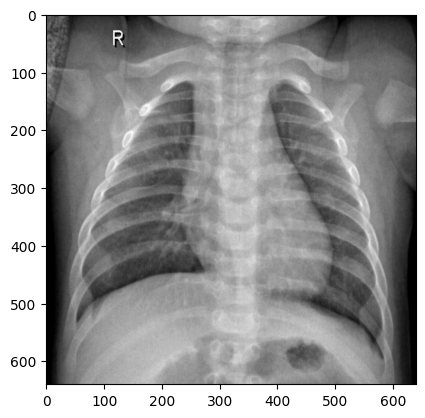

[[[36 36 36]
  [74 74 74]
  [75 75 75]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[38 38 38]
  [79 79 79]
  [82 82 82]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[39 39 39]
  [85 85 85]
  [87 87 87]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]]
Class no: 0


In [9]:
num = 0

plt.figure()
plt.imshow(image_train[num])
plt.show()
print(image_train[num])
print("Class no: {0}".format(label_train[num]))

In [10]:
image_train.shape

(4, 640, 640, 3)

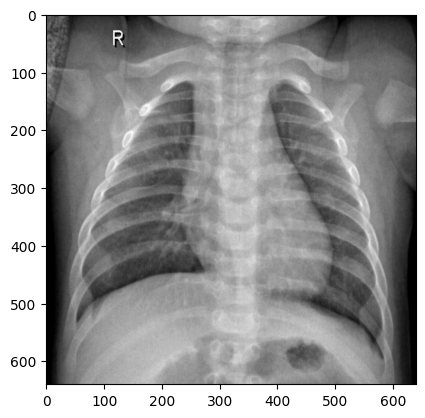

In [11]:
plt.imshow(image_train[0])
plt.show()

In [12]:
# Normalization

# print(tf.constant(image_train).dtype)

image_train = image_train / 255.0
image_test = image_test / 255.0

# image_train.reshape(-1, 640, 640, 1)
# image_test.reshape(-1, 640, 640, 1)




In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(640, 640, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [23]:
model.fit(image_train, label_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 326ms/step - loss: 1.8049 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 76ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 78ms/step - loss: 0.9608 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [24]:
test_loss, test_acc = model.evaluate(image_test, label_test, verbose=2)
print('\nTest Accuracy: ', test_acc)


1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 84ms/epoch - 84ms/step

Test Accuracy:  1.0


In [25]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [26]:
predictions = probability_model.predict(image_test)
predictions[3]

1/1 [==============================] - 0s 71ms/step


array([0., 1.], dtype=float32)

In [27]:
np.argmax(predictions[3])

1

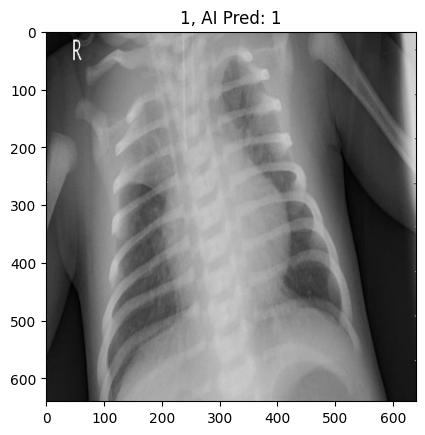

In [28]:
num = 3
plt.imshow(image_test[num])
plt.title(label="{0}, AI Pred: {1}".format(label_test[num], np.argmax(predictions[num])))
plt.show()

In [21]:
import h5py

In [31]:
model.save("LUNG-AI.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1228800)           0         
                                                                 
 dense (Dense)               (None, 64)                78643264  
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 78,651,842
Trainable params: 78,651,842
Non-trainable params: 0
_________________________________________________________________
